### Importing Libraries

In [58]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.stats import norm
from sklearn.metrics import accuracy_score
from math import sqrt
from nltk.stem import PorterStemmer 

### Data Reading

In [59]:
df=pd.read_csv(r'C:\Users\Admin\CD Project\Data.csv',encoding = 'latin',header=None,names=['target','id','time','query','user','tweet'])

In [60]:
df.columns

Index(['target', 'id', 'time', 'query', 'user', 'tweet'], dtype='object')

In [61]:
df.head()

,target,id,time,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [62]:
df = df[['target','tweet']]
df['target'] = df['target'].replace(4,1)

In [63]:
df.head()

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


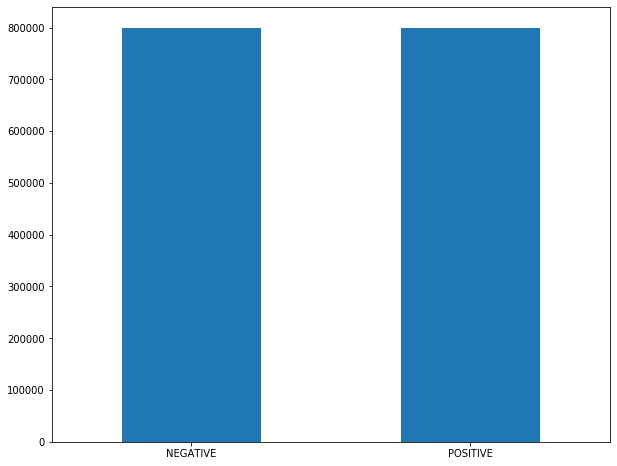

In [64]:
mapping = {0: "NEGATIVE",1: "POSITIVE"}
def sentiment(label):
    return mapping[int(label)]
df.target = df.target.apply(lambda x: sentiment(x))
count_classes = pd.value_counts(df['target'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

In [65]:
text, sentiment = df['tweet'], df['target']

In [66]:
sentiment

0          NEGATIVE
1          NEGATIVE
2          NEGATIVE
3          NEGATIVE
4          NEGATIVE
             ...   
1599995    POSITIVE
1599996    POSITIVE
1599997    POSITIVE
1599998    POSITIVE
1599999    POSITIVE
Name: target, Length: 1600000, dtype: object

In [67]:
import re
from nltk.stem import WordNetLemmatizer
wordLemm = WordNetLemmatizer()
def preprocess_tweet(data):
    preprocessed=[]
    for tweet in data:
        tweet=re.sub(r'@[A-Za-z0-9]+'," ",tweet) ##Removing the usernames
        tweet=re.sub(r'^[A-Za-z0-9.!?]+'," ",tweet) ##Removing digits and punctuations
        tweet=re.sub(r'https?://[A-Za-z0-9./]+'," ",tweet) ## removing links
        tweet=re.sub(r' +'," ",tweet)
        tweet = tweet.lower()
        tweet = re.sub(r"\'s", " ", tweet)
        tweet = re.sub(r"\'ve", " have ", tweet)
        tweet = re.sub(r"can't", "cannot ", tweet)
        tweet = re.sub(r"n't", " not ", tweet)
        tweet = re.sub(r"\'d", " would ", tweet)
        tweet = re.sub(r"\'ll", " will ", tweet)
        tweet = re.sub(r"\'scuse", " excuse ", tweet)
        tweet = tweet.strip(' ')
        tweet = tweet.strip('. .')
        tweet = tweet.replace('.',' ')
        tweet = tweet.replace('-',' ')
        tweet = tweet.replace("’", "'").replace("′", "'").replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")
        tweet = tweet.replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")
        tweet = tweet.replace("€", " euro ").replace("'ll", " will")
        tweet = tweet.replace("don't", "do not").replace("didn't", "did not").replace("im","i am").replace("it's", "it is")
        tweet = tweet.replace(",000,000", "m").replace("n't", " not").replace("what's", "what is")
        tweet = tweet.replace(",000", "k").replace("'ve", " have").replace("i'm", "i am").replace("'re", "are")
        tweet = tweet.replace("he's", "he is").replace("she's", "she is").replace("'s", " own")
        tweet = re.sub('\s+', ' ', tweet)

        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
        preprocessed.append(tweetwords)
    return preprocessed

In [68]:
processedtext = preprocess_tweet(text)
processedtext

['awww, that bummer you shoulda got david carr of third day to do it ;d ',
 'upset that he can not update his facebook by texting it and might cry a result school today also blah! ',
 'dived many ti ames for the ball managed to save 50 percent the rest go out of bound ',
 'whole body feel itchy and like it on fire ',
 'no, it not behaving at all am mad why am here? because can not see you all over there ',
 'not the whole crew ',
 'hug ',
 'hey long ti ame no see! yes rain bit ,only bit lol am fine thanks how you ',
 '_k nope they did not have it ',
 'que me muera ',
 'break in plain city it snowing ',
 'just re pierced my ear ',
 'could not bear to watch it and thought the ua loss wa embarrassing ',
 'it it counts, idk why did either you never talk to me anymore ',
 'would have been the first, but did not have gun not really though, zac snyder just doucheclown ',
 'wish got to watch it with you!! miss you and how wa the premiere?! ',
 'death scene will hurt me severely to watch on fil

In [21]:
processedtext=np.array(processedtext)
processedtext.shape

(1600000,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,test_size = 0.30, random_state = 0)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names())) 

No. of feature_words:  500000


In [24]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [25]:
print('Train Values')
print(X_train.shape)
print(y_train.shape)
print("------------------")
print("Test values")
print(X_test.shape)
print(y_test.shape)

Train Values
(1120000, 500000)
(1120000,)
------------------
Test values
(480000, 500000)
(480000,)


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
XGB=LogisticRegression()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
print("LogisticRegression:\n",metrics.classification_report(y_test,pred))

LogisticRegression:
               precision    recall  f1-score   support

    NEGATIVE       0.83      0.81      0.82    239877
    POSITIVE       0.82      0.83      0.83    240123

    accuracy                           0.82    480000
   macro avg       0.82      0.82      0.82    480000
weighted avg       0.82      0.82      0.82    480000



In [29]:
print("LogisticRegression ACCURACY:",metrics.accuracy_score(y_test,pred))

LogisticRegression ACCURACY: 0.82360625


In [30]:
def model_e(model):
    
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
     

              precision    recall  f1-score   support

    NEGATIVE       0.83      0.82      0.82    239877
    POSITIVE       0.82      0.83      0.83    240123

    accuracy                           0.82    480000
   macro avg       0.83      0.82      0.82    480000
weighted avg       0.83      0.82      0.82    480000



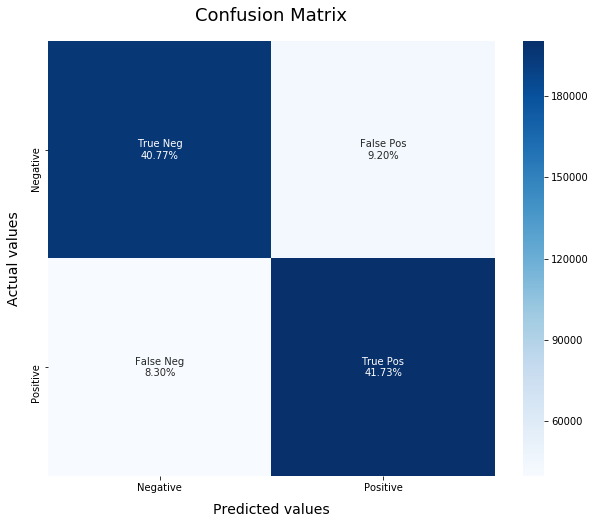

In [31]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_e(LRmodel)

In [32]:
import pickle
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

In [81]:
def load_models():

    file = open(r"C:\Users\Admin\CD Project\vectoriser-ngram-(1,2).pickle")
    vectoriser = pickle.load(file)
    file.close()
    
    file = open(r'C:\Users\Admin\CD Project\Sentiment-LR.pickle')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
   
    textdata = vectoriser.transform(preprocess_tweet(text))
    sentiment = model.predict(textdata)
    
    
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
   
    df = pd.DataFrame(data, columns = ['Tweet','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
   
    text =df2['tweet']
    
    
    df = predict(vectoriser, LRmodel, text)
    df.to_csv('Output.csv')

In [77]:
b = TextBlob(h1)
b.detect_language()
b=b.translate(to="english")
print(b)   

The Nobel Prize has been announced for two American scholars who have studied the bidding process.


In [83]:
df3=pd.read_csv(r'C:\Users\Admin\CD Project\Output.csv')
del df3['Unnamed: 0']
df3.head()

,Tweet,sentiment
0,#studiolife #aislife #requires #passion #dedic...,POSITIVE
1,@user #white #supremacists want everyone to s...,NEGATIVE
2,safe ways to heal your #acne!! #altwaystohe...,POSITIVE
3,is the hp and the cursed child book up for res...,POSITIVE
4,"3rd #bihday to my amazing, hilarious #nephew...",POSITIVE


In [88]:
text.head()

0    #studiolife #aislife #requires #passion #dedic...
1     @user #white #supremacists want everyone to s...
2    safe ways to heal your #acne!!    #altwaystohe...
3    is the hp and the cursed child book up for res...
4      3rd #bihday to my amazing, hilarious #nephew...
Name: tweet, dtype: object

In [107]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity if analysis.sentiment.polarity >= 0 else analysis.sentiment.polarity

df3['polarity'] = df3['Tweet'].apply(lambda text: fetch_sentiment_using_textblob(text))
df3.head()

,Tweet,sentiment,polarity
0,#studiolife #aislife #requires #passion #dedic...,POSITIVE,0.000000
1,@user #white #supremacists want everyone to s...,NEGATIVE,0.068182
2,safe ways to heal your #acne!! #altwaystohe...,POSITIVE,0.781250
3,is the hp and the cursed child book up for res...,POSITIVE,0.500000
4,"3rd #bihday to my amazing, hilarious #nephew...",POSITIVE,0.408333


In [105]:
for p in polarity:
   
    if p > 0.7:
        print('Positive')
    elif p > 0.1:
        print('weak positive')
    elif p > -0.01:
        print('Neutral')

NameError: name 'polarity' is not defined

In [78]:
from textblob import TextBlob
blob1=TextBlob(h1)
for sentence in blob1.sentences:
    if sentence.sentiment.polarity > 0.7:
        print('Positive')
    elif sentence.sentiment.polarity > 0.1:
        print('weak positive')
    elif sentence.sentiment.polarity > -0.01:
        print('Neutral')

Neutral


In [ ]:
import nltk
nltk.download('punkt')  

In [80]:
df2=pd.read_csv(r"C:\Users\Admin\CD Project\test.csv")
del df2['id']
df2.head()

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone to s...
2,safe ways to heal your #acne!! #altwaystohe...
3,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew..."


In [233]:
if blob1.sentiment.polarity >= 0.7:
    print(blob1,'Strong Positive')
elif blob1.sentiment.polarity > 0:
    print(blob1,'positive')
elif blob1.sentiment.polarity < -1:
    print(blob1,'Negative')
elif blob1.sentiment.polarity == -1:
    print(blob1,'Strongly Negative')

Beautiful is better than ugly. Explicit is better than implicit.Simple is better than complex. positive
